In [34]:
import datetime as dt
from pathlib import Path
import requests
import pandas as pd
import numpy as np
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt
plt.close('all')
import yfinance as yf
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [35]:
csv_path = Path("Resources/SQ Hourly Close.csv")
sq_1hr = pd.read_csv(csv_path, index_col=0, infer_datetime_format=True)
sq_1hr.reset_index(inplace=True)
sq_1hr.rename(columns = {'index':'Datetime'}, inplace = True)
sq_1hr.set_index(pd.to_datetime(sq_1hr['Datetime'],infer_datetime_format=True),inplace=True)
sq_1hr.head()

,Datetime,Close
Datetime,,
2019-09-03 09:30:00-04:00,2019-09-03 09:30:00-04:00,62.959999
2019-09-03 10:30:00-04:00,2019-09-03 10:30:00-04:00,62.320000
2019-09-03 11:30:00-04:00,2019-09-03 11:30:00-04:00,62.000000
2019-09-03 12:30:00-04:00,2019-09-03 12:30:00-04:00,61.774899
2019-09-03 13:30:00-04:00,2019-09-03 13:30:00-04:00,61.360001


In [36]:
sq_diff = sq_1hr['Close'].diff()
up = sq_diff.clip(lower=0)
down = -1*sq_diff.clip(upper=0)
ema_up = up.ewm(com=20, adjust=False).mean()
ema_down = down.ewm(com=20, adjust=False).mean()
rs = ema_up/ema_down
rs

Datetime
2019-09-03 09:30:00-04:00         NaN
2019-09-03 10:30:00-04:00    0.000000
2019-09-03 11:30:00-04:00    0.000000
2019-09-03 12:30:00-04:00    0.000000
2019-09-03 13:30:00-04:00    0.000000
                               ...   
2021-08-06 11:30:00-04:00    1.373840
2021-08-06 12:30:00-04:00    1.259652
2021-08-06 13:30:00-04:00    1.239547
2021-08-06 14:30:00-04:00    1.228946
2021-08-06 15:30:00-04:00    1.175830
Name: Close, Length: 3397, dtype: float64

In [37]:
sq_1hr['RSI'] = 100 - (100/(1 + rs))
sq_1hr['RSI'] 

Datetime
2019-09-03 09:30:00-04:00          NaN
2019-09-03 10:30:00-04:00     0.000000
2019-09-03 11:30:00-04:00     0.000000
2019-09-03 12:30:00-04:00     0.000000
2019-09-03 13:30:00-04:00     0.000000
                               ...    
2021-08-06 11:30:00-04:00    57.874170
2021-08-06 12:30:00-04:00    55.745393
2021-08-06 13:30:00-04:00    55.348111
2021-08-06 14:30:00-04:00    55.135756
2021-08-06 15:30:00-04:00    54.040518
Name: RSI, Length: 3397, dtype: float64

In [38]:
# sq_1hr['RSI’]
sq_1hr_rsi= sq_1hr.iloc[14:]
sq_1hr_rsi= sq_1hr.iloc[: , 1:]
sq_1hr_rsi

,Close,RSI
Datetime,,
2019-09-03 09:30:00-04:00,62.959999,NaN
2019-09-03 10:30:00-04:00,62.320000,0.000000
2019-09-03 11:30:00-04:00,62.000000,0.000000
2019-09-03 12:30:00-04:00,61.774899,0.000000
2019-09-03 13:30:00-04:00,61.360001,0.000000
...,...,...
2021-08-06 11:30:00-04:00,278.640015,57.874170
2021-08-06 12:30:00-04:00,276.611908,55.745393
2021-08-06 13:30:00-04:00,276.234985,55.348111


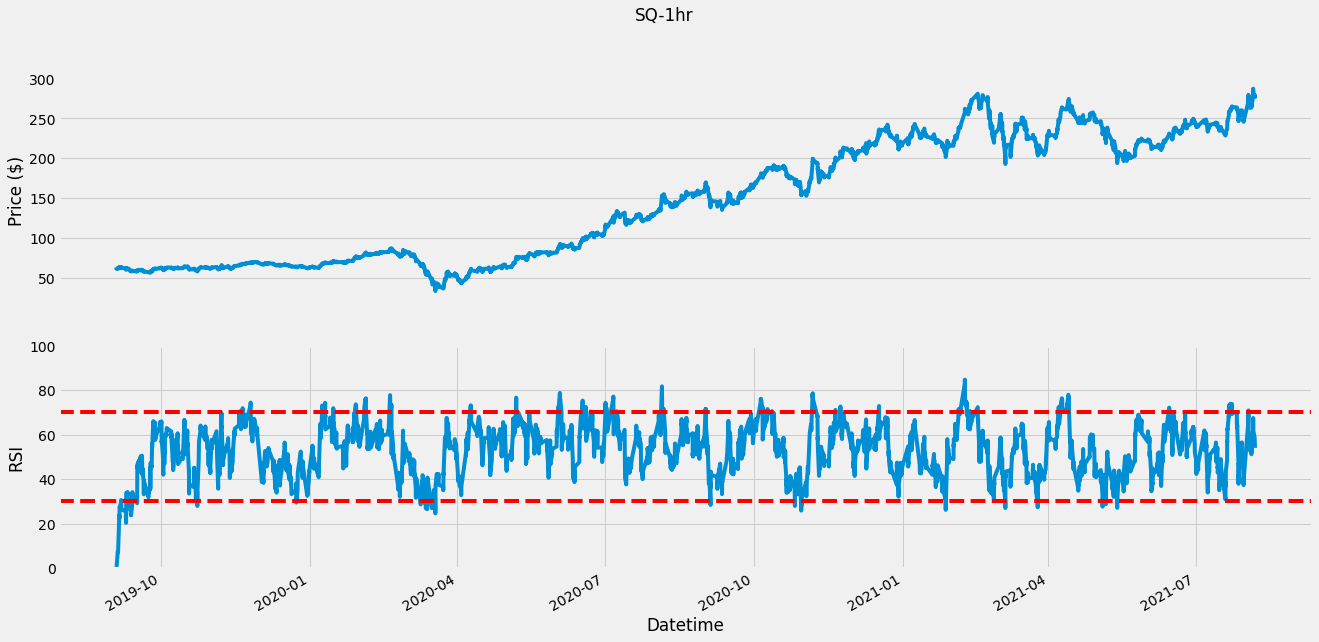

In [39]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.get_xaxis().set_visible(False)
fig.suptitle('SQ-1hr')
sq_1hr_rsi['Close'].plot(ax=ax1)

ax1.set_ylabel('Price ($)')
sq_1hr_rsi['RSI'].plot(ax=ax2)
ax2.set_ylim(0,100)
ax2.axhline(30, color= 'r', linestyle= '--')
ax2.axhline(70, color= 'r', linestyle= '--')
ax2.set_ylabel('RSI')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d12c285c-6789-4c45-9ad7-1be9b4d60622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>